In [60]:
import sys
import os
import importlib

current_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(current_dir, ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

import files
importlib.reload(files)

import utils
importlib.reload(utils)

from files import *
from utils import *


In [61]:
for year, path in files6.items():
      globals()[f"consommation_heat_{year}"] = extract_columns(files6[year])

for year2, path2 in files6.items():
      globals()[f"consommation_cool_{year2}"] = extract_columns(files6[year2],5)  

In [62]:
dfs = [globals()[f"consommation_heat_{year}"] for year in files6.keys()]

consommation_heat = pd.concat(dfs, ignore_index=True)

In [63]:
for year in range(2018, 2025):
    df = globals()[f"consommation_heat_{year}"]
    df_final = add_binary_column(df, column_name="heat_on")
    nb_heat_on_1 = (df_final["heat_on"] == 1).sum()
    print(f"Année {year} : nombre de heat_on == 1 = {nb_heat_on_1}")


Année 2018 : nombre de heat_on == 1 = 143
Année 2019 : nombre de heat_on == 1 = 136
Année 2020 : nombre de heat_on == 1 = 119
Année 2021 : nombre de heat_on == 1 = 138
Année 2022 : nombre de heat_on == 1 = 126
Année 2023 : nombre de heat_on == 1 = 139
Année 2024 : nombre de heat_on == 1 = 135


In [64]:
(consommation_heat_2018["heat_on"]==0).sum()

222

In [66]:
"""
Ajout d'une colonne binaire pour identifier les jours de consommation :
- '1' indique un jour "ON" (consommation > 0)
- '0' indique un jour "OFF" (consommation = 0)
ex:df_final_tou
"""
df_final=add_binary_column(consommation_heat, column_name="heat_on")

In [68]:
(consommation_heat["heat_on"]==0).sum()

1619

In [69]:
"""
Application de l'algorithme K-Means sur les jours de consommation de chauffage à Toulouse (jours 'ON').
Les jours sans consommation (jours 'OFF') sont automatiquement assignés au cluster 3.
"""


df_heat = df_final[df_final["heat_on"] == 1].drop(columns=["heat_on"])
model = apply_kmeans(n_clusters=3, data=df_heat)
df_final.loc[df_final["heat_on"] == 1, "clusters"] = model.labels_
df_final.loc[df_final["heat_on"] == 0, "clusters"] = 3

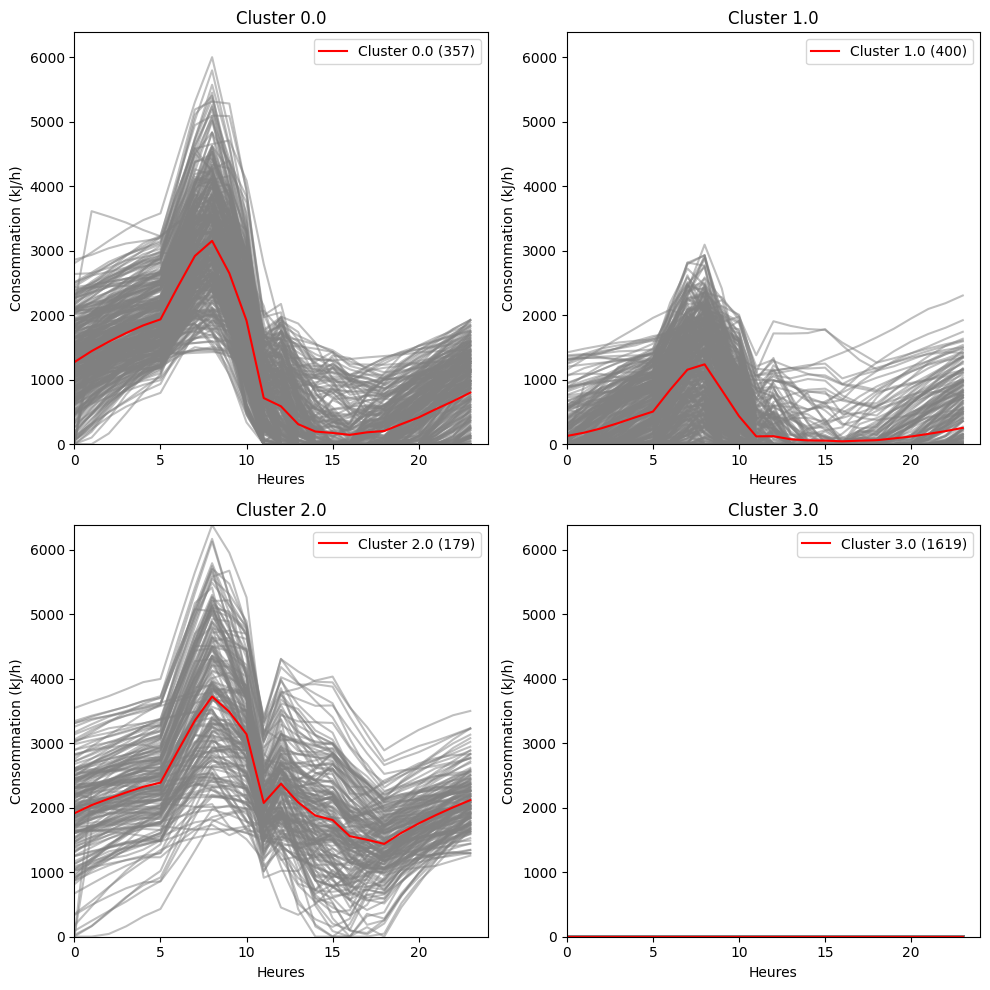

In [70]:
plot_clusters(df_final.drop(columns=["heat_on"]))


In [72]:
df_final.to_csv("../data/simulated_data_7years/conso_kmeans_data/clusters_heat_toulouse_kmeans",index=False)